In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as dates
get_ipython().magic(u'matplotlib inline')

dry_ds = pd.read_csv('./output/40DRY-W')
dry_ds.head(10)

dry_ds.sort(['datetime','number'], ascending = ['true','false']).head()


i = 0
for record in dry_ds['datetime']:
    i += 1
    date = record.split()[0]
    dry_ds.loc[i-1, 'date'] = date

time_aggregate = dry_ds.groupby('date').sum()
time_aggregate.head(10)

,number
date,
2014-08-20,5
2014-08-21,1
2014-08-24,1
2014-09-20,1
2014-09-25,5
2014-09-29,1
2014-10-01,2
2014-10-02,1
2014-10-07,2


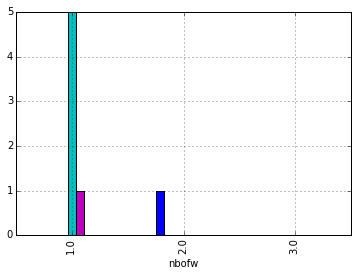

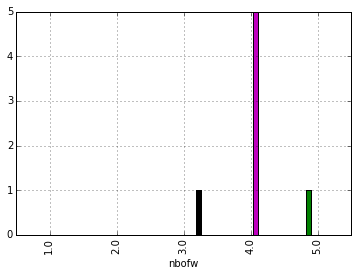

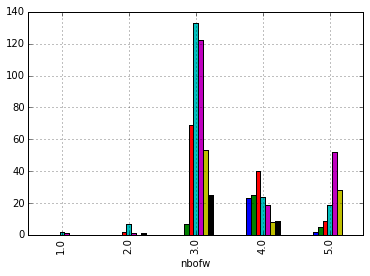

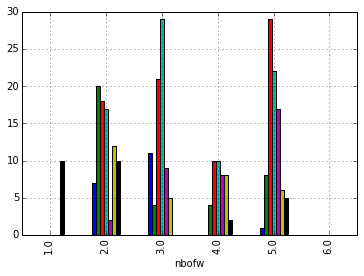

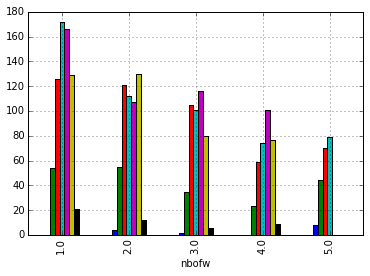

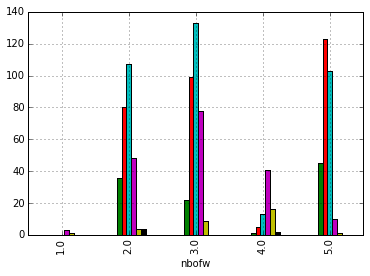

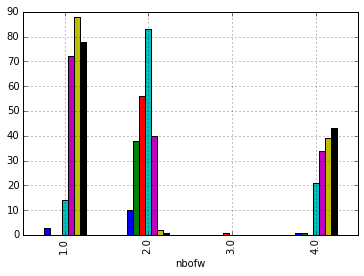

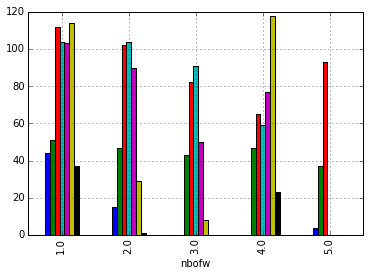

In [3]:
#not very well developed, better if we complete the days in the first month and the last month in the dataset
from datetime import timedelta
data = []
def addTime(df):
    previousTime = dry_ds.ix[0,'date']
    previousNum = dry_ds.ix[0,'number']
    for eachitem in df.itertuples():  #Iterate over rows of DataFrame as tuples, with index value
        currentTime = eachitem[0]
        currentNum = eachitem[1]
        p = datetime.strptime(previousTime,'%Y-%m-%d')
        c = datetime.strptime(currentTime,'%Y-%m-%d')
        if(p < c):
            fillWithZero(data,p,c)
        previousTime = currentTime
        data.append([currentTime,currentNum])
    res = pd.DataFrame(data)
    res.columns = ['time','number']
    return res
        
def fillWithZero(data, start, end):
    delta = int((end - start).total_seconds() // 86400)
    if (delta > 1):
        for i in range(1, delta):
            start = start + timedelta(days = 1)
            data.append([start.strftime('%Y-%m-%d'), 0])
        #data.append([start, 0])
        #date_object = datetime.strptime('2014-04-17', '%Y-%m-%d')
        #date = datetime.strptime('2014-04-30', '%Y-%m-%d')
        #[['2014-04-18', 0], ['2014-04-19', 0], ['2014-04-20', 0], ['2014-04-21', 0], 
        #['2014-04-22', 0], ['2014-04-23', 0], ['2014-04-24', 0], ['2014-04-25', 0],
        #['2014-04-26', 0], ['2014-04-27', 0], ['2014-04-28', 0], ['2014-04-29', 0]]
        
time_complete = addTime(time_aggregate)
time_complete.head(10)


def strToMonth(string):
    d = datetime.strptime(string, '%Y-%m-%d')
    if(d.month == 12):
        d_by_month = datetime(d.year+1,1,1)
    else:
        d_by_month = datetime(d.year,d.month+1,1)
    return d_by_month


# for drawing by weekday 

count = 0
start = 0
currentTime = time_complete['time'][0]
nextMonth = strToMonth(currentTime)

clk = 1
for currentTime in time_complete['time']:    
    i = count
    ct = datetime.strptime(currentTime,'%Y-%m-%d')
    y = ct.year
    m = ct.month
    weekday = datetime.date(ct).weekday()   #calculate weekday of each row and add it here
    time_complete.loc[i-1, 'weekday'] = weekday + 1 #i is the num of current row
    
    # m become the next month when it comes to form the gragh
    if(m == 1):
        y = y - 1
        m = 12
    else:
        m = m - 1
    
 
    if(weekday == 6):   # record the number of the week, so add one when we meet a SUNDAY
        clk += 1

    if(ct < nextMonth):
        
        #time_complete.loc[i-1, 'nbofw'] = (ct.day - 1)/7 + 1
        #time_complete.loc[count-1, 'nbofw'] = int(ct.strftime("%U"))%4 + 1
        time_complete.loc[i, 'nbofw'] = clk
        count += 1
    
    else:  
        clk = 1
        time_complete.loc[i, 'nbofw'] = clk
        nextMonth = strToMonth(currentTime)
        data_by_month = time_complete[start:count]
        pivoted = data_by_month.pivot(index='nbofw',columns = 'weekday', values='number')
        #print pivoted
        #print m
        pivoted.plot(kind='bar',legend = False)
        start = count
        count += 1
      